In [1]:
import numpy as np
import pandas as pd
%display typeset

Nosso modelo pode ser expresso como

ESCREVER MODELO

$$\begin{align}
\frac{dS}{dt}&=-\lambda [(1-\chi) S],\\
\frac{dE}{dt}&= \lambda [(1-\chi) S]-\alpha E,\\
\frac{dI}{dt}&= (1-p)\alpha E - \delta I -\phi I,\\
\frac{dA}{dt}&= p\alpha E - \gamma A,\\
\frac{dH}{dt}&= \phi I -(\rho+\mu) H,\\
\frac{dR}{dt}&= \delta I + \rho H+\gamma A,
\end{align}
$$

In [2]:
# teste anterior
def model(t, y, params):
    S, E, I, R = y
    B, beta, mu, eps, gamma = params
    return [
        B - beta * S * I - mu * S,  # dS/dt
        beta * S * I - (eps + mu) * E,  # dE/dt
        eps * E - (gamma + mu) * I,  # dI/dt
        gamma * I - mu * R,  # dR/dt
    ]

In [3]:
B = 0.01
beta = 0.47272459855759813
mu = 0.00000000000000001
eps = 0.04168480042146949
gamma = 0.04

T = ode_solver()
T.function = model
inits = [.99, 0, 1e-6, 0]
tspan = [0,500]
T.ode_solve(tspan, inits, num_points=5, params=[B, beta, mu, eps, gamma])
model1 = [(k[0], k[1][3]) for k in T.solution]

In [4]:
data1 = np.genfromtxt('data.csv', delimiter=',')[1:]
data2 = [(k[0], k[1]) for k in data1]

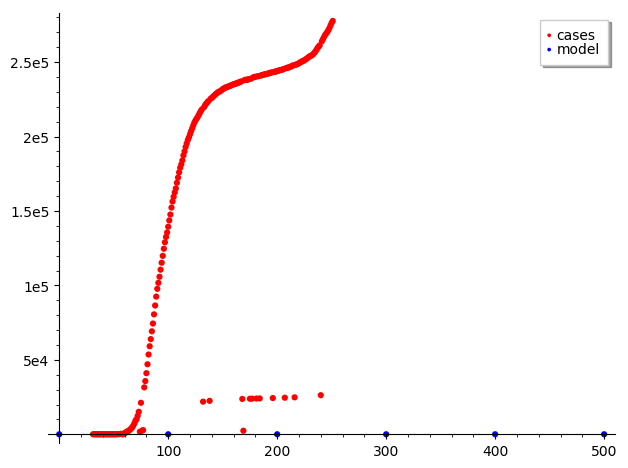

In [5]:
plot1 = list_plot(data2, color='red', pointsize=20, legend_label='cases', alpha=1)
plot1.legend()

plot2 = list_plot(model1, color='blue', pointsize=20, legend_label='model', alpha=1)
plot2.legend()

show(plot1+plot2)

In [6]:
def achaBt(tp, rho):
    beta = [rho[-1]]
    for tempo in range(len(tp)):
        if tp[tempo] != 0:
            nbeta = beta[-1]*(1 - rho[tempo]*(tp[tempo] - tp[tempo - 1])/tp[tempo])
            beta.append(nbeta)
    
    return beta

def model(t, y, params):
    S, E, I, R, D = y
    tp, alpha, rho, f, Ti = params
    '''
        t > 0
        S, E, I, R e D são os compartimentos usuais.
        tp é a partição do tempo que estamos fazendo (dia inicial de cada período)
        alpha é o vetor de alphas para cada intervalo em tp (são constantes)
        rho é o vetor dos rho_k para cada intervalo tp (usados na função de beta)
            uma ideia é colocar beta(t_0) em rho[-1]
        f é o vetor de f(t) para cada intervalo pt (são constantes também)
        Ti é a taxa de mortalidade
    '''
    # criar um vetor de betas para os tempos finais de cada tp
    beta = achaBt(tp, rho)
    
    indice = 0
    while t <= tp[indice]:
        # só para saber em qual tempo estamos
        indice += 1
        
    beta = beta[indice]*(1 - rho[indice]*(t - tp[indice])/t)
    alpha = alpha[indice]
    ft = f[indice]
    
    return [
        - beta / N * S * I,  # dS/dt
        beta / N * S * I - alpha * E,  # dE/dt
        alpha * E - 1 / Ti * I,  # dI/dt
        (1 - tf) / Ti * I,  # dR/dt
        ft / Ti * I # dD/dt
    ]


In [12]:
tp = [0, 10, 30, 33, 43, 51, 59, 78, 102, 130, 143, 166, 181, 202, 228, 249, 265, 283]
alpha = [0.07 for i in range(len(tp))]
rho = [0.1 for i in range(len(tp))]
f = [0.05 for i in range(len(tp))]
Ti = 0.05

'''
    acho que esse Ti pode estar sendo repetitivo aqui, ele meio que denota a taxa de falecimento, não?
    os tp eu fiz uma divisão +- inspirada nas ações governamentais do owid, o resto foi fixo só para ver como fica
'''

T = ode_solver()
T.function = model
inits = [.99, 0, 1e-6, 0, 0]
tspan = [0,500]
T.ode_solve(tspan, inits, num_points=5, params=[tp, alpha, rho, f, Ti])
model1 = [(k[0], k[1][3]) for k in T.solution]

ValueError: error solving